In [1]:
library(tidyverse)
library(tximeta)
library(SummarizedExperiment)
library(org.Hs.eg.db)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,


In [2]:
#SAVEVAR

save_fig = FALSE

save_data = FALSE

In [3]:
coldata <- read.table("./salmon/sampfile.csv", sep=",", header=TRUE)
coldata

files,names
<chr>,<chr>
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A10_S169_quant/quant.sf,A10_S169_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A10_S265_quant/quant.sf,A10_S265_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A10_S73_quant/quant.sf,A10_S73_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A11_S177_quant/quant.sf,A11_S177_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A11_S273_quant/quant.sf,A11_S273_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A11_S81_quant/quant.sf,A11_S81_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A12_S185_quant/quant.sf,A12_S185_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A12_S281_quant/quant.sf,A12_S281_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A12_S89_quant/quant.sf,A12_S89_quant


In [4]:
se <- tximeta(coldata)
se

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 
78 
79 
80 
81 
82 
83 
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100 
101 
102 
103 
104 
105 
106 
107 
108 
109 
110 
111 
112 
113 
114 
115 
116 
117 
118 
119 
120 
121 
122 
123 
124 
125 
126 
127 
128 
129 
130 
131 
132 
133 
134 
135 
136 
137 
138 
139 
140 
141 
142 
143 
144 
145 
146 
147 
148 
149 
150 
151 
152 
153 
154 
155 
156 
157 
158 
159 
160 
161 
162 
163 
164 
165 
166 
167 
168 
169 
170 
171 
172 
173 
174 
175 
176 
177 
178 
179 
180 
181 
182 
183 
184 
185 
186 
187 
188 
189 
190 
191 
192 
193 
194 
195 
196 
197 
198 
199 
200 
201 
202 
203 
204 
205 
206 
207 
208 
209 
210 

class: RangedSummarizedExperiment 
dim: 177456 288 
metadata(6): tximetaInfo quantInfo ... txomeInfo txdbInfo
assays(3): counts abundance length
rownames(177456): ENST00000631435 ENST00000415118 ... ENST00000646356
  ENST00000645792
rowData names(8): tx_id tx_biotype ... tx_id_version tx_name
colnames(288): A10_S169_quant A10_S265_quant ... H9_S264_quant
  H9_S72_quant
colData names(1): names

In [5]:
assays(se)$counts

,A10_S169_quant,A10_S265_quant,A10_S73_quant,A11_S177_quant,A11_S273_quant,A11_S81_quant,A12_S185_quant,A12_S281_quant,A12_S89_quant,A1_S193_quant,⋯,H6_S48_quant,H7_S152_quant,H7_S248_quant,H7_S56_quant,H8_S160_quant,H8_S256_quant,H8_S64_quant,H9_S168_quant,H9_S264_quant,H9_S72_quant
ENST00000631435,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000415118,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000448914,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000434970,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000439842,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000390567,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000452198,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000390569,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000437320,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000390571,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
gse <- summarizeToGene(se)  #countsFromAbundance="lengthScaledTPM"??
gse

loading existing EnsDb created: 2022-03-23 09:57:38

obtaining transcript-to-gene mapping from database

loading existing gene ranges created: 2022-03-23 09:57:50

summarizing abundance

summarizing counts

summarizing length



class: RangedSummarizedExperiment 
dim: 37951 288 
metadata(6): tximetaInfo quantInfo ... txomeInfo txdbInfo
assays(3): counts abundance length
rownames(37951): ENSG00000000003 ENSG00000000005 ... ENSG00000288031
  ENSG00000288053
rowData names(9): gene_id gene_name ... entrezid tx_ids
colnames(288): A10_S169_quant A10_S265_quant ... H9_S264_quant
  H9_S72_quant
colData names(1): names

In [10]:
assays(gse)$counts %>% apply(2, round) %>% write.csv("./salmon_raw_counts.csv")

In [7]:
genes <- c("ENSG00000075624", "ENSG00000141736")
mtx <- assays(gse)$abundance
mtx <- mtx %>% as.data.frame()
mtx

,A10_S169_quant,A10_S265_quant,A10_S73_quant,A11_S177_quant,A11_S273_quant,A11_S81_quant,A12_S185_quant,A12_S281_quant,A12_S89_quant,A1_S193_quant,⋯,H6_S48_quant,H7_S152_quant,H7_S248_quant,H7_S56_quant,H8_S160_quant,H8_S256_quant,H8_S64_quant,H9_S168_quant,H9_S264_quant,H9_S72_quant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,0,17.233816,0,3.181567,21.553973,15.207149,6.891990,16.286820,0,0,⋯,0,5.027363,10.493002,17.979584,0,27.216281,18.889689,3.678955,0,9.119847
ENSG00000000005,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,⋯,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000
ENSG00000000419,0,40.395561,0,100.832316,59.574742,22.355028,52.415316,61.298547,0,0,⋯,0,93.871106,33.479771,45.685990,0,53.416734,62.067192,73.130239,0,75.756934
ENSG00000000457,0,0.000000,0,4.688519,6.359881,0.000000,7.939953,0.893774,0,0,⋯,0,1.414142,0.000000,4.435304,0,2.443922,0.860840,4.540416,0,1.579839
ENSG00000000460,0,0.000000,0,25.120373,1.456099,0.059568,15.208909,0.526403,0,0,⋯,0,21.130416,0.000000,0.498955,0,0.435196,0.797097,5.733527,0,14.033302
ENSG00000000938,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,⋯,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000
ENSG00000000971,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,⋯,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000
ENSG00000001036,0,0.000000,0,11.805103,0.000000,7.314655,12.202671,0.000000,0,0,⋯,0,5.836611,0.000000,56.733921,0,0.000000,84.946519,7.219049,0,49.799460
ENSG00000001084,0,1.311699,0,0.588245,14.014435,15.866601,3.456593,4.825698,0,0,⋯,0,13.923460,0.000000,17.056582,0,1.994786,1.716985,2.429449,0,0.000000


In [8]:
#Making genes per cell statistics.
gpc <- mtx
gpc["Genes_per_cell",] <- 0
for (i in 1:length(colnames(gpc))) {
    gpc["Genes_per_cell",i] <- which(gpc[,i] !=0) %>% length()
}
#Making cells per gene statistics. (Commented out because it takes long to run.)
#mtx[,"Cells_per_gene"] <- 0
#for (i in 1:length(rownames(mtx))) {
#    mtx[i,"Cells_per_gene"] <- which(mtx[i,] !=0) %>% length()
#}
gpc

,A10_S169_quant,A10_S265_quant,A10_S73_quant,A11_S177_quant,A11_S273_quant,A11_S81_quant,A12_S185_quant,A12_S281_quant,A12_S89_quant,A1_S193_quant,⋯,H6_S48_quant,H7_S152_quant,H7_S248_quant,H7_S56_quant,H8_S160_quant,H8_S256_quant,H8_S64_quant,H9_S168_quant,H9_S264_quant,H9_S72_quant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,0,17.233816,0,3.181567,21.553973,15.207149,6.891990,16.286820,0,0,⋯,0,5.027363,10.493002,17.979584,0,27.216281,18.889689,3.678955,0,9.119847
ENSG00000000005,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,⋯,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000
ENSG00000000419,0,40.395561,0,100.832316,59.574742,22.355028,52.415316,61.298547,0,0,⋯,0,93.871106,33.479771,45.685990,0,53.416734,62.067192,73.130239,0,75.756934
ENSG00000000457,0,0.000000,0,4.688519,6.359881,0.000000,7.939953,0.893774,0,0,⋯,0,1.414142,0.000000,4.435304,0,2.443922,0.860840,4.540416,0,1.579839
ENSG00000000460,0,0.000000,0,25.120373,1.456099,0.059568,15.208909,0.526403,0,0,⋯,0,21.130416,0.000000,0.498955,0,0.435196,0.797097,5.733527,0,14.033302
ENSG00000000938,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,⋯,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000
ENSG00000000971,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,⋯,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000
ENSG00000001036,0,0.000000,0,11.805103,0.000000,7.314655,12.202671,0.000000,0,0,⋯,0,5.836611,0.000000,56.733921,0,0.000000,84.946519,7.219049,0,49.799460
ENSG00000001084,0,1.311699,0,0.588245,14.014435,15.866601,3.456593,4.825698,0,0,⋯,0,13.923460,0.000000,17.056582,0,1.994786,1.716985,2.429449,0,0.000000


In [9]:
cnts <- assays(gse)$counts %>% as.data.frame()
cnts["Counts_per_cell",] <- 0
for (i in 1:length(colnames(cnts))) {
    cnts["Counts_per_cell",i] <- sum(cnts[,i])
}
cnts

,A10_S169_quant,A10_S265_quant,A10_S73_quant,A11_S177_quant,A11_S273_quant,A11_S81_quant,A12_S185_quant,A12_S281_quant,A12_S89_quant,A1_S193_quant,⋯,H6_S48_quant,H7_S152_quant,H7_S248_quant,H7_S56_quant,H8_S160_quant,H8_S256_quant,H8_S64_quant,H9_S168_quant,H9_S264_quant,H9_S72_quant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,0,12.000,0,20.901,19.000,155.511,40.994,15.000,0,0,⋯,0,20.000,8.000,256.000,0,25.000,64.948,19.980,0,72.000
ENSG00000000005,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0,0,⋯,0,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0.000
ENSG00000000419,0,27.000,0,288.000,42.000,97.000,121.000,44.000,0,0,⋯,0,142.000,20.000,227.000,0,42.000,96.001,149.001,0,263.001
ENSG00000000457,0,0.000,0,33.248,7.000,0.000,62.587,2.000,0,0,⋯,0,6.108,0.000,63.000,0,3.000,4.000,25.018,0,17.000
ENSG00000000460,0,0.000,0,231.800,3.000,1.113,156.051,1.000,0,0,⋯,0,154.140,0.000,13.072,0,1.000,5.000,55.648,0,203.853
ENSG00000000938,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0,0,⋯,0,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0.000
ENSG00000000971,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0,0,⋯,0,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0.000
ENSG00000001036,0,0.000,0,76.000,0.000,80.000,77.000,0.000,0,0,⋯,0,25.000,0.000,848.867,0,0.000,247.000,41.000,0,423.310
ENSG00000001084,0,2.000,0,6.000,11.000,100.978,18.000,2.000,0,0,⋯,0,11.000,0.000,112.090,0,1.000,8.987,10.000,0,0.000


In [10]:
qc <- read.table("./salmon/salmon_QC.csv", sep=",", header=FALSE)
colnames(qc) = c("sample", "alignment_eff")
qc

sample,alignment_eff
<chr>,<dbl>
C10_S267_quant,0.1179000
B9_S258_quant,0.1157460
C2_S203_quant,0.1150940
C11_S83_quant,0.9247440
B2_S106_quant,0.8986310
H8_S256_quant,0.1235230
B3_S210_quant,0.1154170
B7_S146_quant,0.8865970
A2_S105_quant,0.9064330


In [11]:
#Making statistics dataframe.
if (all(colnames(cnts) == colnames(gpc))) {
    stat <- cbind(t(gpc[37952,]), t(cnts[37952,]))
}
stat <- stat %>% as.data.frame()
stat <- rownames_to_column(stat, var="sample")
stat

sample,Genes_per_cell,Counts_per_cell
<chr>,<dbl>,<dbl>
A10_S169_quant,11,11.000
A10_S265_quant,7271,268773.961
A10_S73_quant,23,24.000
A11_S177_quant,12130,2209382.972
A11_S273_quant,6673,282441.989
A11_S81_quant,10946,3220091.011
A12_S185_quant,11813,1875505.948
A12_S281_quant,6765,265537.999
A12_S89_quant,11,11.000


In [12]:
cell_data <- read.csv("../sample_data_withNTCs.csv", sep=";", skip=18, header=TRUE)
cell_data["Ids"] = str_c(cell_data[,2], "_S", cell_data[,1], "_quant")
cell_data

Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Sample_Project,Cell.Count,Ids
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A1,MCF7,A01,N701-A,TAAGGCGA,S502-A,ATAGAGAG,CYTENA,1,A1_S1_quant
2,B1,MCF7,A02,N702-A,CGTACTAG,S502-A,ATAGAGAG,CYTENA,1,B1_S2_quant
3,C1,MCF7,A03,N703-A,AGGCAGAA,S502-A,ATAGAGAG,CYTENA,1,C1_S3_quant
4,D1,MCF7,A04,N704-A,TCCTGAGC,S502-A,ATAGAGAG,CYTENA,1,D1_S4_quant
5,E1,MCF7,A05,N705-A,GGACTCCT,S502-A,ATAGAGAG,CYTENA,1,E1_S5_quant
6,F1,MCF7,A06,N706-A,TAGGCATG,S502-A,ATAGAGAG,CYTENA,1,F1_S6_quant
7,G1,MCF7,A07,N707-A,CTCTCTAC,S502-A,ATAGAGAG,CYTENA,1,G1_S7_quant
8,H1,MCF7,A08,N710-A,CGAGGCTG,S502-A,ATAGAGAG,CYTENA,NTC,H1_S8_quant
9,A2,MCF7,A09,N711-A,AAGAGGCA,S502-A,ATAGAGAG,CYTENA,1,A2_S9_quant


In [13]:
alm <- qc
stat <- full_join(stat, alm, by="sample")
stat <- full_join(stat, cell_data[,c(2,3,4,10,11)], by=c("sample" = "Ids"))
stat

sample,Genes_per_cell,Counts_per_cell,alignment_eff,Sample_Name,Sample_Plate,Sample_Well,Cell.Count
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
A10_S169_quant,11,11.000,0.3928570,A10,BT474_SETB,G01,2
A10_S265_quant,7271,268773.961,0.1119180,A10,CHO,G01,1
A10_S73_quant,23,24.000,0.3076920,A10,MCF7,G01,1
A11_S177_quant,12130,2209382.972,0.9018400,A11,BT474_SETB,G09,1
A11_S273_quant,6673,282441.989,0.1107310,A11,CHO,G09,1
A11_S81_quant,10946,3220091.011,0.8781640,A11,MCF7,G09,1
A12_S185_quant,11813,1875505.948,0.8921700,A12,BT474_SETB,H05,1
A12_S281_quant,6765,265537.999,0.1108280,A12,CHO,H05,1
A12_S89_quant,11,11.000,0.5000000,A12,MCF7,H05,1


In [14]:
stat[stat["Counts_per_cell"] < 100000 & stat["Sample_Plate"] == "MCF7",]

,sample,Genes_per_cell,Counts_per_cell,alignment_eff,Sample_Name,Sample_Plate,Sample_Well,Cell.Count
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
3,A10_S73_quant,23,24.000,0.3076920,A10,MCF7,G01,1
9,A12_S89_quant,11,11.000,0.5000000,A12,MCF7,H05,1
11,A1_S1_quant,47,48.000,0.1720430,A1,MCF7,A01,1
21,A4_S25_quant,26,29.000,0.1183670,A4,MCF7,C01,1
39,B10_S74_quant,0,0.000,0.0000000,B10,MCF7,G02,1
45,B12_S90_quant,24,25.000,0.4716980,B12,MCF7,H06,1
47,B1_S2_quant,18,18.000,0.0814480,B1,MCF7,A02,1
57,B4_S26_quant,2485,6397.992,0.0954541,B4,MCF7,C02,1
66,B7_S50_quant,204,281.999,0.0380105,B7,MCF7,E02,0


In [15]:
stat[str_detect(stat[["Sample_Well"]], "H") & stat["Sample_Plate"] == "MCF7",]

,sample,Genes_per_cell,Counts_per_cell,alignment_eff,Sample_Name,Sample_Plate,Sample_Well,Cell.Count
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
9,A12_S89_quant,11,11,0.500000,A12,MCF7,H05,1
45,B12_S90_quant,24,25,0.471698,B12,MCF7,H06,1
81,C12_S91_quant,0,0,0.000000,C12,MCF7,H07,1
117,D12_S92_quant,76,83,0.643411,D12,MCF7,H08,1
150,E11_S85_quant,0,0,0.000000,E11,MCF7,H01,1
153,E12_S93_quant,43,44,0.343750,E12,MCF7,H09,1
186,F11_S86_quant,10,10,0.454545,F11,MCF7,H02,1
189,F12_S94_quant,19,18,0.418605,F12,MCF7,H10,1
222,G11_S87_quant,0,0,0.000000,G11,MCF7,H03,1


In [16]:
stat[str_detect(stat[["Sample_Well"]], "H") & stat["Sample_Plate"] == "BT474_SETB",]

,sample,Genes_per_cell,Counts_per_cell,alignment_eff,Sample_Name,Sample_Plate,Sample_Well,Cell.Count
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
7,A12_S185_quant,11813,1875506,0.892170,A12,BT474_SETB,H05,1
43,B12_S186_quant,11580,1671259,0.895017,B12,BT474_SETB,H06,1
79,C12_S187_quant,12237,2224324,0.913891,C12,BT474_SETB,H07,1
115,D12_S188_quant,12314,2537748,0.907911,D12,BT474_SETB,H08,1
148,E11_S181_quant,0,0,0.000000,E11,BT474_SETB,H01,1
151,E12_S189_quant,11399,1988531,0.894176,E12,BT474_SETB,H09,1
184,F11_S182_quant,9477,462232,0.726788,F11,BT474_SETB,H02,1
187,F12_S190_quant,13395,4092852,0.902329,F12,BT474_SETB,H10,1
220,G11_S183_quant,11615,2366473,0.901961,G11,BT474_SETB,H03,1


In [17]:
stat[stat["Counts_per_cell"] < 100000 & stat["Sample_Plate"] == "BT474_SETB",]

,sample,Genes_per_cell,Counts_per_cell,alignment_eff,Sample_Name,Sample_Plate,Sample_Well,Cell.Count
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,A10_S169_quant,11,11.000,0.3928570,A10,BT474_SETB,G01,2
12,A1_S97_quant,334,450.999,0.2718510,A1,BT474_SETB,A01,1
28,A7_S145_quant,10,10.000,0.3571430,A7,BT474_SETB,E01,1
34,A9_S161_quant,30,34.000,0.6415090,A9,BT474_SETB,F05,1
37,B10_S170_quant,56,59.000,0.5728160,B10,BT474_SETB,G02,1
40,B11_S178_quant,26,27.000,0.0879479,B11,BT474_SETB,G10,1
70,B9_S162_quant,37,40.000,0.5882350,B9,BT474_SETB,F06,1
73,C10_S171_quant,53,54.000,0.5934070,C10,BT474_SETB,G03,1
76,C11_S179_quant,29,30.000,0.1785710,C11,BT474_SETB,G11,1


In [18]:
#write.csv(stat, "./qc_stats_emucscrna.csv")

In [19]:
#write.csv(mtx["Cells_per_gene"], "./cells_per_gene_stats.csv")
#write.csv(mtx[37952,], "./genes_per_cell_stats.csv")


In [20]:
#Removing wells with no cells.
#cell_data <- read.csv("../sample_data_withNTCs.csv", sep=";", skip=18, header=TRUE)
#cell_data <- cell_data[cell_data["Cell.Count"] == 1,]
#cell_data["Ids"] = str_c(cell_data[,2], "_S", cell_data[,1], "_quant")
#sc <- cell_data[["Ids"]]
#sc <- cell_data[cell_data["Cell.Count"] == 1, "Ids"]
#sc

In [21]:
#Removing non-singlets.
#mtx <- mtx[,colnames(mtx) %in% sc]
#mtx

In [22]:
keep <- (stat %>% dplyr::filter(Counts_per_cell > 100000 & alignment_eff > 0.8))[["sample"]]
keep

[1] "A11_S177_quant" "A11_S81_quant"  "A12_S185_quant" "A2_S105_quant" 
  [5] "A2_S9_quant"    "A3_S113_quant"  "A3_S17_quant"   "A4_S121_quant" 
  [9] "A5_S129_quant"  "A5_S33_quant"   "A6_S137_quant"  "A6_S41_quant"  
 [13] "A7_S49_quant"   "A8_S153_quant"  "A8_S57_quant"   "A9_S65_quant"  
 [17] "B11_S82_quant"  "B12_S186_quant" "B1_S98_quant"   "B2_S106_quant" 
 [21] "B2_S10_quant"   "B3_S114_quant"  "B3_S18_quant"   "B4_S122_quant" 
 [25] "B5_S130_quant"  "B5_S34_quant"   "B6_S138_quant"  "B6_S42_quant"  
 [29] "B7_S146_quant"  "B8_S154_quant"  "B8_S58_quant"   "B9_S66_quant"  
 [33] "C11_S83_quant"  "C12_S187_quant" "C1_S99_quant"   "C2_S107_quant" 
 [37] "C2_S11_quant"   "C3_S115_quant"  "C3_S19_quant"   "C4_S27_quant"  
 [41] "C5_S131_quant"  "C5_S35_quant"   "C6_S139_quant"  "C6_S43_quant"  
 [45] "C7_S51_quant"   "C8_S155_quant"  "C8_S59_quant"   "C9_S67_quant"  
 [49] "D10_S172_quant" "D11_S84_quant"  "D12_S188_quant" "D1_S100_quant" 
 [53] "D2_S108_quant"  "D2_S12_quant"   "D3_S116_quant"  "D3_S20_quant"  
 [57] "D4_S124_quant"  "D5_S132_quant"  "D5_S36_quant"   "D6_S140_quant" 
 [61] "D6_S44_quant"   "D7_S148_quant"  "D8_S156_quant"  "D8_S60_quant"  
 [65] "D9_S68_quant"   "E10_S173_quant" "E12_S189_quant" "E1_S101_quant" 
 [69] "E1_S5_quant"    "E2_S109_quant"  "E3_S117_quant"  "E3_S21_quant"  
 [73] "E4_S125_quant"  "E4_S29_quant"   "E5_S37_quant"   "E6_S141_quant" 
 [77] "E7_S149_quant"  "E7_S53_quant"   "E8_S61_quant"   "E9_S69_quant"  
 [81] "F10_S174_quant" "F12_S190_quant" "F1_S102_quant"  "F1_S6_quant"   
 [85] "F2_S110_quant"  "F3_S118_quant"  "F3_S22_quant"   "F4_S126_quant" 
 [89] "F4_S30_quant"   "F5_S134_quant"  "F6_S142_quant"  "F7_S150_quant" 
 [93] "F7_S54_quant"   "F8_S62_quant"   "F9_S70_quant"   "G10_S175_quant"
 [97] "G10_S79_quant"  "G11_S183_quant" "G12_S191_quant" "G1_S103_quant" 
[101] "G1_S7_quant"    "G2_S111_quant"  "G3_S119_quant"  "G3_S23_quant"  
[105] "G4_S127_quant"  "G5_S39_quant"   "G6_S143_quant"  "G7_S151_quant" 
[109] "G7_S55_quant"   "G8_S63_quant"   "G9_S167_quant"  "G9_S71_quant"  
[113] "H10_S176_quant" "H10_S80_quant"  "H11_S184_quant" "H12_S192_quant"
[117] "H1_S104_quant"  "H1_S8_quant"    "H2_S112_quant"  "H3_S120_quant" 
[121] "H3_S24_quant"   "H4_S128_quant"  "H4_S32_quant"   "H5_S136_quant" 
[125] "H6_S144_quant"  "H7_S152_quant"  "H7_S56_quant"   "H8_S64_quant"  
[129] "H9_S168_quant"  "H9_S72_quant"

In [23]:
mtx <- mtx[rownames(mtx) %in% genes, colnames(mtx) %in% keep]
mtx <- t(mtx)
mtx <- mtx %>% as.data.frame()
mtx <- mtx %>% dplyr::mutate(ErbB2divATCB=ENSG00000141736/ENSG00000075624)
mtx

,ENSG00000075624,ENSG00000141736,ErbB2divATCB
,<dbl>,<dbl>,<dbl>
A11_S177_quant,7348.055,43.510765,0.0059213989
A11_S81_quant,2886.112,18.178176,0.0062984991
A12_S185_quant,4990.647,44.587302,0.0089341724
A2_S105_quant,4887.441,41.817390,0.0085560914
A2_S9_quant,14776.157,1.726161,0.0001168207
A3_S113_quant,8289.344,68.375662,0.0082486211
A3_S17_quant,8383.272,2.089898,0.0002492938
A4_S121_quant,3508.461,74.226983,0.0211565627
A5_S129_quant,8869.139,64.945653,0.0073226562


In [24]:
mtx <- rownames_to_column(mtx, var = "sample")
mtx

sample,ENSG00000075624,ENSG00000141736,ErbB2divATCB
<chr>,<dbl>,<dbl>,<dbl>
A11_S177_quant,7348.055,43.510765,0.0059213989
A11_S81_quant,2886.112,18.178176,0.0062984991
A12_S185_quant,4990.647,44.587302,0.0089341724
A2_S105_quant,4887.441,41.817390,0.0085560914
A2_S9_quant,14776.157,1.726161,0.0001168207
A3_S113_quant,8289.344,68.375662,0.0082486211
A3_S17_quant,8383.272,2.089898,0.0002492938
A4_S121_quant,3508.461,74.226983,0.0211565627
A5_S129_quant,8869.139,64.945653,0.0073226562


In [25]:
celline <- read.table("../celline_data.csv", sep=",", header=TRUE)
celline["X"] <- str_c(celline[["X"]], "_quant")
celline

X,cell_line
<chr>,<chr>
A10_S169_quant,BT474_SETB
A10_S265_quant,CHO
A10_S73_quant,MCF7
A11_S177_quant,BT474_SETB
A11_S273_quant,CHO
A11_S81_quant,MCF7
A12_S185_quant,BT474_SETB
A12_S281_quant,CHO
A12_S89_quant,MCF7


In [26]:
#Es gibt keine CHO Zellen in der filtrierten Datei, es ist deswegen, weil die CHO-Zellen alle eine sehr niedrige
#Alignment-Effektivität haben.
mtx <- left_join(mtx, celline, by=c("sample"="X"))
mtx <- left_join(mtx, qc, by=c("sample"="sample"))
#x %>% dplyr::filter(cell_line == "CHO" & alignment_eff > 0.15)
mtx

sample,ENSG00000075624,ENSG00000141736,ErbB2divATCB,cell_line,alignment_eff
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
A11_S177_quant,7348.055,43.510765,0.0059213989,BT474_SETB,0.901840
A11_S81_quant,2886.112,18.178176,0.0062984991,MCF7,0.878164
A12_S185_quant,4990.647,44.587302,0.0089341724,BT474_SETB,0.892170
A2_S105_quant,4887.441,41.817390,0.0085560914,BT474_SETB,0.906433
A2_S9_quant,14776.157,1.726161,0.0001168207,MCF7,0.916066
A3_S113_quant,8289.344,68.375662,0.0082486211,BT474_SETB,0.904049
A3_S17_quant,8383.272,2.089898,0.0002492938,MCF7,0.917947
A4_S121_quant,3508.461,74.226983,0.0211565627,BT474_SETB,0.811900
A5_S129_quant,8869.139,64.945653,0.0073226562,BT474_SETB,0.915953


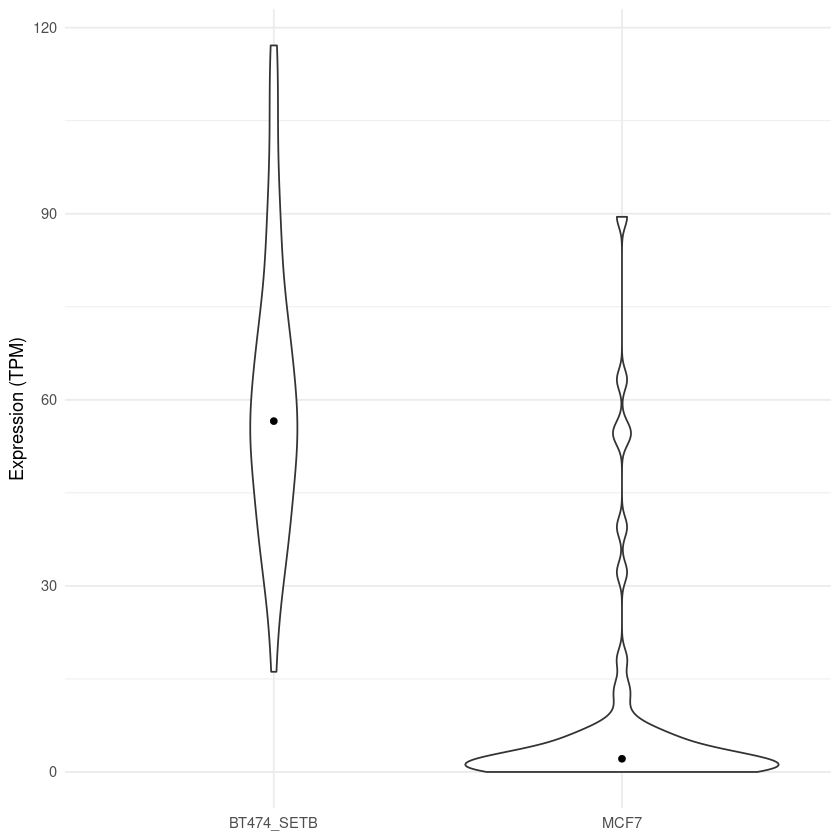

In [27]:
p <- ggplot(mtx, aes(x=cell_line, y=ENSG00000141736)) + 
  geom_violin() + labs(x = NULL, y = "Expression (TPM)") +
    theme(axis.title.y = element_text(vjust = 2, size = 15), axis.text.y = element_text(size = 15),
         axis.text.x = element_text(size = 15)) +
            stat_summary(fun=median, geom="point", color="black") + theme_minimal()

p
            





#+ scale_y_continuous(trans='log2')


In [28]:
if (save_fig == TRUE) { 
   ggsave("./ErbB2.png", p)
}


In [29]:
if (save_data == TRUE) {
    write.csv(mtx, "ErbB2_ACTB_TPM.csv")
}

In [30]:
x <- dplyr::filter(mtx, celline == "MCP7")
median(x[["ENSG00000141736"]])

ERROR: [1m[33mError[39m in [1m[1m[30m[47m[30m[47m`dplyr::filter()`[47m[30m[49m[39m:[22m
[1m[22m[33m![39m Problem while computing `..1 = celline == "MCP7"`.
[31m✖[39m Input `..1` must be of size 130 or 1, not size 288.


In [ ]:
x <- dplyr::filter(mtx, celline == "MCF7")
median(x[["ENSG00000141736"]])

In [ ]:
y <- dplyr::filter(mtx, celline == "BT474_SETB")
median(y[["ENSG00000141736"]])

In [ ]:
x <- dplyr::filter(mtx, celline == "MCF7")
median(x[["ENSG00000075624"]])

In [ ]:
y <- dplyr::filter(mtx, celline == "BT474_SETB")
median(y[["ENSG00000075624"]])

In [52]:
keys <- keys(org.Hs.eg.db, keytype="ENSEMBL")
anno <- ensembldb::select(org.Hs.eg.db, keys=keys, columns=c('ENTREZID', 'SYMBOL', 'GENENAME'), keytype="ENSEMBL")
ct <- assays(gse)$counts %>% as.data.frame()
ct['ENSEMBL'] <- rownames(ct)
ct <- left_join(ct, anno, by="ENSEMBL")
ct <- ct[!is.na(ct$SYMBOL),]
rownames(ct) <- ct$SYMBOL
ct[,1:288]
ct



#%>% write.csv("./raw_cnts_EMU.csv")

'select()' returned 1:many mapping between keys and columns

Warning message:
"non-unique values when setting 'row.names': 'AADACL2', 'AATF', 'ABCB11', 'ABCC1', 'ABCC6', 'ABCC6P2', 'ABCF1', 'ABHD16A', 'ABO', 'ABR', 'ACACA', 'ADAM18', 'ADAM2', 'ADAM32', 'ADAM9', 'ADAMTS12', 'ADI1', 'AGER', 'AGK', 'AGPAT1', 'AIF1', 'AK6', 'AKT3', 'ALOX5', 'ANO4', 'AP2A2', 'APBA1', 'APBA2', 'APOBEC3A', 'APOBEC3A_B', 'APOL5', 'APOM', 'ARHGAP11A', 'ARHGAP11B', 'ARHGAP23', 'ARHGAP27', 'ARHGEF10', 'ARHGEF26', 'ARHGEF5', 'ARL17A', 'ARL17B', 'ARMC10', 'ARMCX5-GPRASP2', 'ASIC5', 'ATAT1', 'ATF6B', 'ATP6V1G2', 'ATP9B', 'AZU1', 'B2M', 'B3GALT4', 'B3GNTL1', 'BAAT', 'BAG6', 'BCAR1', 'BDH1', 'BDP1', 'BFAR', 'BLK', 'BMERB1', 'BOLA2', 'BRD2', 'BTBD7', 'BTG3', 'BTNL2', 'C2', 'C21orf62', 'C22orf15', 'C4A', 'C4B', 'C4orf36', 'C6orf136', 'C6orf15', 'C6orf47', 'C8orf74', 'CANX', 'CARS1', 'CATSPERB', 'CCDC125', 'CCDC92', 'CCHCR1', 'CCL14', 'CCL15', 'CCL16', 'CCL18', 'CCL23', 'CCL3', 'CCL3L1', 'CCL3L3', 'CCL4', 'CCL4L1', 'CCL4

ERROR: Error in `.rowNamesDF<-`(x, value = value): duplicate 'row.names' are not allowed


In [62]:
z <- assays(gse)$counts
t(z[,colnames(z) %in% keep]) %>% write.csv("./raw_cnts_EMU_MCF7.csv")

In [67]:
mcf7 <- (stat %>% dplyr::filter(Counts_per_cell > 100000 & alignment_eff > 0.8 & Sample_Plate=="MCF7"))$sample
mcf7

[1] "A11_S81_quant" "A2_S9_quant"   "A3_S17_quant"  "A5_S33_quant" 
 [5] "A6_S41_quant"  "A7_S49_quant"  "A8_S57_quant"  "A9_S65_quant" 
 [9] "B11_S82_quant" "B2_S10_quant"  "B3_S18_quant"  "B5_S34_quant" 
[13] "B6_S42_quant"  "B8_S58_quant"  "B9_S66_quant"  "C11_S83_quant"
[17] "C2_S11_quant"  "C3_S19_quant"  "C4_S27_quant"  "C5_S35_quant" 
[21] "C6_S43_quant"  "C7_S51_quant"  "C8_S59_quant"  "C9_S67_quant" 
[25] "D11_S84_quant" "D2_S12_quant"  "D3_S20_quant"  "D5_S36_quant" 
[29] "D6_S44_quant"  "D8_S60_quant"  "D9_S68_quant"  "E1_S5_quant"  
[33] "E3_S21_quant"  "E4_S29_quant"  "E5_S37_quant"  "E7_S53_quant" 
[37] "E8_S61_quant"  "E9_S69_quant"  "F1_S6_quant"   "F3_S22_quant" 
[41] "F4_S30_quant"  "F7_S54_quant"  "F8_S62_quant"  "F9_S70_quant" 
[45] "G10_S79_quant" "G1_S7_quant"   "G3_S23_quant"  "G5_S39_quant" 
[49] "G7_S55_quant"  "G8_S63_quant"  "G9_S71_quant"  "H10_S80_quant"
[53] "H1_S8_quant"   "H3_S24_quant"  "H4_S32_quant"  "H7_S56_quant" 
[57] "H8_S64_quant"  "H9_S72_quant"

In [68]:
stat %>% write.csv("./sample_data.csv")